# Introduction to qudit quantum computing

In this tutorial, users will learn how to use qudit setting in QuAIRKit.

**Table of Contents**
- [Review on qubit case](#Review-on-qubit-case)
- [Setup for qutrit case](#Setup-for-qutrit-case)
- [Setup for general cases](#Setup-for-general-cases)
- [Operations in qudit circuits](#Operations-in-qudit-circuits)
    - [Adding custom gates](#Adding-custom-gates)
    - [Adding custom channels](#Adding-custom-channels)
    - [Measurement](#Measurement)

In [1]:
import quairkit as qkit
from quairkit import Circuit
from quairkit.database import *
from quairkit.loss import *

qkit.set_dtype('complex128')
split_line = '\n' + '-' * 100 + '\n'  # a line of '-' for better readability

### Review on qubit case

The default setting in quantum computing is qubit unless specified otherwise. For detailed instruction on qubit circuits, please refer to the tutorials of states and circuits.

Users can check the number of qubits, qutrits, and systems in the circuit using  `cir.num_qubits`, `cir.num_qutrits` and `cir.num_systems`, respectively.

For example, one can create a circuit with 3 qubits:

The diagram of the quantum circuit:


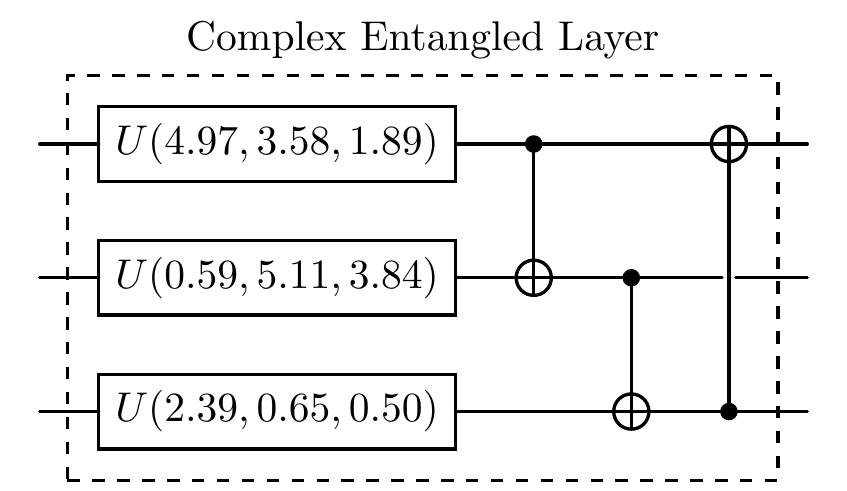


----------------------------------------------------------------------------------------------------

Are the systems composed of qubits? True
----------------------------------------------------------------------------------------------------
The total number of qubits in the circuit is 3
----------------------------------------------------------------------------------------------------
The total number of qutrits in the circuit is 0
----------------------------------------------------------------------------------------------------
The total number of systems in the circuit is 3
----------------------------------------------------------------------------------------------------


In [2]:
num_qubits = 3  # number of qubits
cir = Circuit(num_qubits)  # construct a circuit with specifying the number of qubits

cir.complex_entangled_layer()  # add a complex entangled layer

print('The diagram of the quantum circuit:')
cir.plot()
print(split_line)   # a line of '-' for better readability

print(f'Are the systems composed of qubits? {cir().are_qubits()}', end=split_line)
print(f'The total number of qubits in the circuit is {cir.num_qubits}', end=split_line)
print(f'The total number of qutrits in the circuit is {cir.num_qutrits}', end=split_line)
print(f'The total number of systems in the circuit is {cir.num_systems}', end=split_line)

One can also verify the dimension of each system using the `System dimension` attribute from the `State` class.

In [3]:
print(f'The output state of the circuit is {cir()}') 

The output state of the circuit is 
-----------------------------------------------------
 Backend: default-pure
 System dimension: [2, 2, 2]
 System sequence: [0, 1, 2]
[-0.28+0.j   -0.17+0.01j -0.19+0.11j -0.19-0.09j -0.05+0.04j -0.56-0.43j
 -0.25-0.48j -0.03+0.08j]
-----------------------------------------------------



## Setup for qutrit case

To configure the qudit state and its corresponding circuit, users can set `system_dim` to $d$, where $d$ represents the dimension of the qudit. 

For instance, one can assign `system_dim` = $3$ for qutrit. Then, the following code establishes the qutrit setup:


In [4]:
rho = random_state(2, system_dim=3) # generate a random 2-qutrit state

print(f'The number of systems of the state is {rho.num_systems}', end=split_line)
print(f'The dimension of each system of the state is {rho.system_dim}', end=split_line)
print(f'Are the systems composed of qutrits? {rho.are_qutrits()}', split_line)

print(f'Random 2-qutrit states: {rho}')

The number of systems of the state is 2
----------------------------------------------------------------------------------------------------
The dimension of each system of the state is [3, 3]
----------------------------------------------------------------------------------------------------
Are the systems composed of qutrits? True 
----------------------------------------------------------------------------------------------------

Random 2-qutrit states: 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [3, 3]
 System sequence: [0, 1]
[[ 0.12+0.j    0.03+0.j   -0.  +0.02j  0.02+0.j   -0.  +0.01j -0.  -0.01j
  -0.04+0.03j  0.02-0.01j -0.01+0.01j]
 [ 0.03-0.j    0.14+0.j    0.04-0.j    0.  -0.01j -0.01+0.j   -0.1 +0.04j
  -0.  -0.02j -0.  +0.03j -0.02-0.01j]
 [-0.  -0.02j  0.04+0.j    0.07+0.j   -0.01+0.02j  0.  +0.01j  0.  -0.j
  -0.01+0.02j -0.03-0.j   -0.03+0.01j]
 [ 0.02-0.j    0.  +0.01j -0.01-0.02j  0.09+0.j    0.01+0.04j  0.  -0.

The corresponding qutrit circuit is as follows:

In [5]:
cir = Circuit(num_systems=2, system_dim=3)  # create a circuit with 2 systems, each of dimension 3

print(f'Are the systems composed of qutrits? {cir().are_qutrits()}', end=split_line)
print(f'The total number of qubits in the circuit is {cir.num_qubits}', end=split_line)
print(f'The total number of qutrits in the circuit is {cir.num_qutrits}', end=split_line)
print(f'The total number of systems in the circuit is {cir.num_systems}', end=split_line)

Are the systems composed of qutrits? True
----------------------------------------------------------------------------------------------------
The total number of qubits in the circuit is 0
----------------------------------------------------------------------------------------------------
The total number of qutrits in the circuit is 2
----------------------------------------------------------------------------------------------------
The total number of systems in the circuit is 2
----------------------------------------------------------------------------------------------------


## Setup for general cases

QuAIRKit supports general $d$-dimensional setup for qudits, as well as their compound, by setting `system_dim` as $[d_0, d_2, d_3, \cdots, d_{n-1}]$.

For example, to configure a 3-qudit system with dimensions $[2, 3, 6]$:

In [6]:
rho = random_state(num_systems=3, system_dim=[2, 3, 6])   # generate a random state with 3 systems of dimensions [2, 3, 6]

print(f'The number of systems of the state is {rho.num_systems}', end=split_line)
print(f'The dimension of each system of the state is {rho.system_dim}', end=split_line)

print(f'Random 3-qudit states: {rho}')

The number of systems of the state is 3
----------------------------------------------------------------------------------------------------
The dimension of each system of the state is [2, 3, 6]
----------------------------------------------------------------------------------------------------
Random 3-qudit states: 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [2, 3, 6]
 System sequence: [0, 1, 2]
[[ 0.03+0.j    0.01-0.01j  0.01-0.j   ... -0.01-0.j   -0.  -0.j
  -0.  -0.01j]
 [ 0.01+0.01j  0.03+0.j   -0.  +0.01j ...  0.  -0.01j  0.  -0.01j
  -0.  -0.01j]
 [ 0.01+0.j   -0.  -0.01j  0.02+0.j   ... -0.01-0.j    0.01-0.j
  -0.01+0.j  ]
 ...
 [-0.01+0.j    0.  +0.01j -0.01+0.j   ...  0.04+0.j   -0.  +0.01j
  -0.  +0.j  ]
 [-0.  +0.j    0.  +0.01j  0.01+0.j   ... -0.  -0.01j  0.02+0.j
  -0.  +0.j  ]
 [-0.  +0.01j -0.  +0.01j -0.01-0.j   ... -0.  -0.j   -0.  -0.j
   0.03+0.j  ]]
-----------------------------------------------------



The following codes illustrate compound dimensions of qudits in a quantum circuit.

In [7]:
cir = Circuit(3, system_dim=[2, 3, 6])  # generate a random state with 3 systems of dimensions [2, 3, 6]

print(f'The total number of qubits in the circuit is {cir.num_qubits}', end=split_line)
print(f'The total number of qutrits in the circuit is {cir.num_qutrits}', end=split_line)
print(f'The total number of systems in the circuit is {cir.num_systems}', end=split_line)

The total number of qubits in the circuit is 1
----------------------------------------------------------------------------------------------------
The total number of qutrits in the circuit is 1
----------------------------------------------------------------------------------------------------
The total number of systems in the circuit is 3
----------------------------------------------------------------------------------------------------


## Operations in qudit circuits

QuAIRKit offers a variety of operations for qudit circuits, including:

- [Adding custom gates](#Adding-custom-gates)
- [Adding custom channels](#Adding-custom-channels)
- [Measurement](#Measurement)

In this section, we will demonstrate how to use these operations.

### Adding custom gates

One can define and incorporate custom gates into qudit circuits. Here is an example of how to define custom gates in qudit circuits:

The diagram of the qudit circuit:


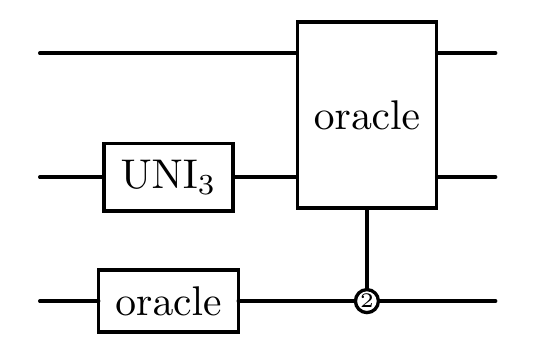

In [8]:
# generate a random state with 3 systems of dimensions [2, 3, 6]
cir = Circuit(3, system_dim=[2, 3, 6])  

# add a 3-dimension gate acting on the system 1
cir.universal_qudits([1])  
# add a 6-dimension custom gate acting on the system 2
cir.oracle(random_unitary(1, system_dim=6), system_idx=[2]) 
# add a custom gate with the system 2 as control qudit acting on the 3 systems 
cir.oracle(random_unitary(2, system_dim=[3, 2]), control_idx=2, system_idx=[2, 1, 0])  

print('The diagram of the qudit circuit:')
cir.plot()

### Adding custom channels

One can create and integrate custom channels into qudit circuits. Here’s a simple example of how to create a replacement channel in QuAIRKit:


In [9]:
# create a circuit with 3 qudits and dimensions [2, 3, 6] for corresponding qudit systems
cir = Circuit(3, system_dim=[4, 3, 2])  

rho = random_state(1, system_dim=4) # create a random state 

# generate the replacement channel in Choi representation
replacement_choi_repr = replacement_choi(rho) 
# add the replacement channel acting on the system 0
cir.choi_channel(replacement_choi_repr, system_idx=[0]) 

print('The first system is replaced with state', rho)
print('while the output state of first system is:', cir().trace([1, 2]))

The first system is replaced with state 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [4]
 System sequence: [0]
[[ 0.24+0.j    0.17-0.25j -0.05-0.02j  0.01-0.01j]
 [ 0.17+0.25j  0.45+0.j   -0.  -0.04j -0.01+0.08j]
 [-0.05+0.02j -0.  +0.04j  0.12+0.j    0.11-0.01j]
 [ 0.01+0.01j -0.01-0.08j  0.11+0.01j  0.19+0.j  ]]
-----------------------------------------------------

while the output state of first system is: 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [4]
 System sequence: [0]
[[ 0.24+0.j    0.17-0.25j -0.05-0.02j  0.01-0.01j]
 [ 0.17+0.25j  0.45+0.j   -0.  -0.04j -0.01+0.08j]
 [-0.05+0.02j -0.  +0.04j  0.12+0.j    0.11-0.01j]
 [ 0.01+0.01j -0.01-0.08j  0.11+0.01j  0.19+0.j  ]]
-----------------------------------------------------



Similarly, QuAIRKit also supports batch computation for qudits. The following code demonstrates a simple example of batch computation in circuits:

In [10]:
batch_size = 5  # the number of batch size

# create a circuit with 3 qudits and dimensions [2, 3, 6] for corresponding qudit systems
cir = Circuit(3, system_dim=[2, 3, 6])  
cir.universal_qudits(system_idx=[0, 1])  # add a universal gate to qudit system 0 and 1
cir.oracle(random_unitary(1, size=batch_size, system_dim=6), system_idx=[2])    # add an custom gate to qudit system 2

print('The output state of the second system is:', cir().trace([0, 2]))

The output state of the second system is: 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [3]
 System sequence: [0]
 Batch size: [5]

 # 0:
[[0.76+0.j   0.06+0.02j 0.12+0.34j]
 [0.06-0.02j 0.06+0.j   0.02+0.04j]
 [0.12-0.34j 0.02-0.04j 0.18+0.j  ]]
 # 1:
[[0.76+0.j   0.06+0.02j 0.12+0.34j]
 [0.06-0.02j 0.06+0.j   0.02+0.04j]
 [0.12-0.34j 0.02-0.04j 0.18+0.j  ]]
 # 2:
[[0.76+0.j   0.06+0.02j 0.12+0.34j]
 [0.06-0.02j 0.06+0.j   0.02+0.04j]
 [0.12-0.34j 0.02-0.04j 0.18+0.j  ]]
 # 3:
[[0.76+0.j   0.06+0.02j 0.12+0.34j]
 [0.06-0.02j 0.06+0.j   0.02+0.04j]
 [0.12-0.34j 0.02-0.04j 0.18+0.j  ]]
 # 4:
[[0.76+0.j   0.06+0.02j 0.12+0.34j]
 [0.06-0.02j 0.06+0.j   0.02+0.04j]
 [0.12-0.34j 0.02-0.04j 0.18+0.j  ]]
-----------------------------------------------------



### Measurement

Measurement operations in qudits are similar to those in qubit systems. Users just need to set the measurement basis dimensions to match the corresponding qudit system.

In [11]:
op = Measure('x') # define Pauli X basis as the measurement basis 

# measure the system 0 in the X basis for obtaining measurement result '1'
prob, state = op(cir(), system_idx=[0], keep_state=True, desired_result='1')    
print("The first state for obtaining measurement result '1' for the system 0 is", state[0])


op = Measure()  # computational basis as the measurement basis 

# measure systems 1 and 2, and obtaining measurement result '2' for the system 1, and '4' for the system 2
prob, state = op(cir(), system_idx=[1, 2], desired_result='24', keep_state=True)
print("The first state for obtaining measurement result '2' for the system 1, and '4' for the system 2 is", state[0])

The first state for obtaining measurement result '1' for the system 0 is 
-----------------------------------------------------
 Backend: default-pure
 System dimension: [2, 3, 6]
 System sequence: [0, 1, 2]
 Batch size: [1]

 # 0:
[-0.07+0.01j -0.01+0.03j  0.31+0.03j  0.08+0.07j  0.02-0.14j  0.05-0.1j
  0.11+0.03j  0.04-0.03j -0.42-0.23j -0.07-0.14j -0.11+0.19j -0.13+0.11j
 -0.  +0.01j  0.  +0.j    0.01-0.03j  0.01-0.01j -0.02-0.01j -0.01-0.01j
  0.07-0.01j  0.01-0.03j -0.31-0.03j -0.08-0.07j -0.02+0.14j -0.05+0.1j
 -0.11-0.03j -0.04+0.03j  0.42+0.23j  0.07+0.14j  0.11-0.19j  0.13-0.11j
  0.  -0.01j -0.  -0.j   -0.01+0.03j -0.01+0.01j  0.02+0.01j  0.01+0.01j]
-----------------------------------------------------

The first state for obtaining measurement result '2' for the system 1, and '4' for the system 2 is 
-----------------------------------------------------
 Backend: default-pure
 System dimension: [2, 3, 6]
 System sequence: [0, 1, 2]
 Batch size: [1]

 # 0:
[ 0.  +0.j    0.  

After measuring some qudits, if we want to perform additional operations, users can utilize the `cir.collapse` function to collapse the measured qudits. By printing the output state of the circuit, the average probability distribution of the collapsed qudits is obtained.


In [12]:
batch_size = 5  # the numbar of batch size

# create a circuit with 3 qudits and dimensions [2, 3, 6] for corresponding qudit systems
cir = Circuit(3, system_dim=[2, 3, 6])  

cir.universal_qudits(system_idx=[0, 1])  # add a universal gate to qudit system 0 and 1
cir.oracle(random_unitary(1, size=batch_size, system_dim=6), system_idx=[2])    # add an custom gate to qudit system 2

# Collapse the second qudit to its first eigenstate and the third qudit to its third eigenstate
cir.collapse([1, 2], desired_result='13', if_print=True)

print("\n After collapsing the second qudit to its first eigenstate and the third qudit to its third eigenstate",
      "the state of the first system is:", cir().trace([1, 2]))

systems [[1, 2]] collapse to the state |1>|3> with (average) probability 0.007088132912915589

 After collapsing the second qudit to its first eigenstate and the third qudit to its third eigenstate the state of the first system is: 
-----------------------------------------------------
 Backend: default-mixed
 System dimension: [2]
 System sequence: [0]
 Batch size: [5, 1]

 # 0:
[[0.74+0.j   0.29+0.33j]
 [0.29-0.33j 0.26+0.j  ]]
 # 1:
[[0.74+0.j   0.29+0.33j]
 [0.29-0.33j 0.26+0.j  ]]
 # 2:
[[0.74+0.j   0.29+0.33j]
 [0.29-0.33j 0.26+0.j  ]]
 # 3:
[[0.74+0.j   0.29+0.33j]
 [0.29-0.33j 0.26+0.j  ]]
 # 4:
[[0.74+0.j   0.29+0.33j]
 [0.29-0.33j 0.26+0.j  ]]
-----------------------------------------------------



---

In [13]:
qkit.print_info()


---------VERSION---------
quairkit: 0.4.1
torch: 2.8.0+cpu
numpy: 2.2.6
scipy: 1.15.3
matplotlib: 3.10.5
---------SYSTEM---------
Python version: 3.10.18
OS: Windows
OS version: 10.0.26100
---------DEVICE---------
CPU: ARMv8 (64-bit) Family 8 Model 1 Revision 201, Qualcomm Technologies Inc
